# Machine learning Fundamentals Linear Regression: Honey Production 


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model


In [41]:
#import dataframe
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

In [42]:
df


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [43]:
#the total production of honey per year
prod_per_year=df.groupby('year').totalprod.mean().reset_index()

In [44]:
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [45]:
#Create a variable called X that is the column of year
X= prod_per_year['year']


In [46]:
#reshape it to get it into the right format
X= X.values.reshape(-1,1)


In [47]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [48]:
#Create a variable called y that is the totalprod column
y=prod_per_year['totalprod']

In [49]:
y


0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

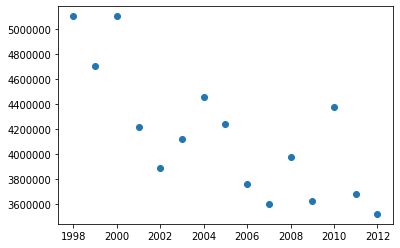

In [50]:
#Using plt.scatter(), plot y vs X as a scatterplot
plt.scatter(X, y)

#### -> a tremendous decrease on honey bee over the years

In [51]:
#Create a linear regression model from scikit-learn and call it regr
regr = linear_model.LinearRegression()


In [52]:
#Fit the model to the data by using .fit()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#print out the slope of the line, and the intercept of the line
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238195
181208083.10732982


In [54]:
#Create a list called y_predict that is the predictions your regr model would make on the X data.
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934687, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

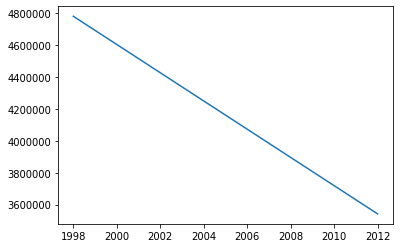

In [55]:
#Plot y_predict vs X as a line
plt.plot(X, y_predict)

### It looks like the production of honey has been in decline, according to this linear model.
### Let's predict the yearr 2050 may look like in terms of honey production.

In [56]:
#create a NumPy array called X_future that is the range from 2013 to 2050.
X_future=np.array(range(2013, 2050))

In [60]:
#reshape it for scikit-learn
X_future=X_future.reshape(-1,1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

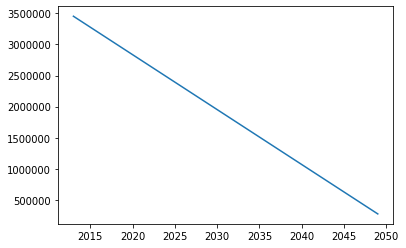

In [61]:
#Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future
future_predict=regr.predict(X_future)
plt.plot(X_future, future_predict)


In [ ]:
#honey will be produced in the year 2050 less than 50000(kg/pound/$)